# TP 04 : Régression logistique Multinomiale

Nous avons implémenté le cas d'une seule classe (binaire : oui ou non). Pour appliquer un classement sur plusieurs classes, on peut entrainner $L$ modèles de régression logistique (où $L$ est le nombre des classes). Dans ce cas, nos résultats (Y) doivent encodée en 0 et 1. Pour un modèle $M_i$ d'une classe $C_i$, la sortie $Y$ doit avoir 1 si $C_i$, 0 si une autre classe. (One-to-rest classification)

Une autre approche (celle qu'on va implémenter) est d'encoder la sortie en utilisant OneHot encoder. Pour $L$ classes et un échantillon donnée, on va avoir $L$ sorties (une ayant 1 et les autres 0). Pour un dataset avec $M$ échantillons, $N$ caractéristiques et $L$ classes, on va avoir les dimensions suivantes : 
- $X (M, N)$
- $Y (M, L)$
- $\theta (L, N)$

Cette dernière approche s'appelle maximum entropy (MaxEnt). Elle généralise la régresion logistique.

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## 1- Implémentation 

### 1.1- Fonctions utiles

In [9]:
# Défininir des fonctions qui génèrent des vecteurs ou des matrices
# Ces fonctions seront utilisées pour générer les Thétas

def generer_zeros_2(nbr_x, nbr_y):
    return np.zeros((nbr_x, nbr_y))

def generer_uns_2(nbr_x, nbr_y):
    return np.ones((nbr_x, nbr_y))

def generer_aleatoire_2(nbr_x, nbr_y):
    return np.random.rand(nbr_x, nbr_y)
    
generer_zeros_2(2, 3), generer_uns_2(2, 3), generer_aleatoire_2(2, 3)

(array([[0., 0., 0.],
        [0., 0., 0.]]), array([[1., 1., 1.],
        [1., 1., 1.]]), array([[0.87323221, 0.22167537, 0.43307017],
        [0.39535335, 0.59789865, 0.88092648]]))

In [10]:
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0],1)), X_pre ,axis=1)
    return X_pre, mean, std

In [11]:
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    X_norm = (X - mean)/std
    return X_norm, mean, std

### 1.2- Combinaison linéaire
On combine les m caractéristiques linéairement. La seule chose différente est que z dans ce cas est une matrice. (nombre_échantillons * nombre_classes) 

$$z=\theta_0+\sum\limits_{i=1}^{m} \theta_i x_i = X \theta^T $$

In [12]:
# TODO implémenter la fonction de combinaison linéaire 
def z_n(X, Theta): 
    Theta_t = np.matrix.transpose(Theta)
    return np.dot(X, Theta_t)

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

#Résulat : 
# array([[0. , 0. , 0. ],
#       [0.5, 0.1, 0.6],
#       [0.2, 0.3, 0. ],
#       [0.7, 0.4, 0.6]])
z_n(X_tn, Theta_tn)

array([[0. , 0. , 0. ],
       [0.5, 0.1, 0.6],
       [0.2, 0.3, 0. ],
       [0.7, 0.4, 0.6]])

### 1.2- Calcul des probabilités

Les valeurs combinées sont transformées à des probabilités en utilisant la fonction softmax. $L$ est le nombre de classes. $Z$ est un vecteur des comninations linéaires.

Dans la fonction softmax génère des poids où la somme des colonnes toujours donne 1.0 

$$softmax(Z)=\frac{e^Z}{\sum\limits_{k=1}^{L} e^{Z_k}}$$

In [13]:
# TODO compléter la fonction softmax
def softmax(z):
    e_x = np.exp(z)
    Somme = np.sum(np.exp(z), axis=1)
    return   np.exp(z)/Somme[:, None]

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

# Résultat : 
# array([[0.33333333, 0.33333333, 0.33333333],
#       [0.36029662, 0.24151404, 0.39818934],
#       [0.34200877, 0.37797814, 0.28001309],
#       [0.37797814, 0.28001309, 0.34200877]])
softmax(z_n(X_tn, Theta_tn))

array([[0.33333333, 0.33333333, 0.33333333],
       [0.36029662, 0.24151404, 0.39818934],
       [0.34200877, 0.37797814, 0.28001309],
       [0.37797814, 0.28001309, 0.34200877]])

In [14]:
def h_n(X, Theta_n, mean=None, std=None, const=False): 
    norm = (mean is not None) and (std is not None)
    X_pre, mean, std = preparer(X, norm, const, mean=mean, std=std)
    return softmax(z_n(X_pre, Theta_n))

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

# Résulat : 
# array([[0.33333333, 0.33333333, 0.33333333],
#       [0.36029662, 0.24151404, 0.39818934],
#       [0.34200877, 0.37797814, 0.28001309],
#       [0.37797814, 0.28001309, 0.34200877]])
h_n(X_tn, Theta_tn)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.36029662, 0.24151404, 0.39818934],
       [0.34200877, 0.37797814, 0.28001309],
       [0.37797814, 0.28001309, 0.34200877]])

### 1.3- La fonction du cout 

- L: nombre des classes 
- M: nombre des échantillons

$$ cout(h_\theta(x), y) = - \sum\limits_{c=1}^{L} y_c \log(h_{\theta,c}(x))$$

$$J(\theta) = \frac{1}{M} \sum\limits_{i=1}^{M} cout(h_\theta(x^{(i)}), y^{(i)})$$

In [15]:
# TODO compléter 
def Cost(h, Y):
    #Cost function Cost(H,Y)
    Y_t = np.transpose(Y)
    Log_h = np.log(h)
    return -np.dot(Log_h, Y_t)
def J_n(H, Y):
    #The loss function J(w)
    cout = Cost(H,Y) 
    M, somme = cout.size, np.sum(cout)
    return somme/M

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

# 1.1913194426181715
J_n(h_n(X_tn, Theta_tn), Y_tn)

1.0913194426181716

### 1.4- Les gradients

$$\frac{\partial J(\theta)}{\theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (h_\theta(x^{(i)}) - y^{(i)}) x_{ij} $$

In [16]:
# TODO compléter
def gradient_n(X, H, Y):
    m = Y.shape[0]
    return    np.dot(np.transpose(np.subtract(H,Y)),X)/m

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

# Résultat :
# array([[-0.06543131, -0.07000327],
#       [-0.11961822,  0.16449781],
#       [ 0.18504953, -0.09449454]])
gradient_n(X_tn, h_n(X_tn, Theta_tn), Y_tn)

array([[-0.06543131, -0.07000327],
       [-0.11961822,  0.16449781],
       [ 0.18504953, -0.09449454]])

### 1.5- Entraînnement (algorithme du gradient)

Les coéfficients sont mis à jour itérativement en se basant sur le gradient et un pas d'apprentissage $\alpha$. Puisque cette fonction a été implémentée dans le TP précédent, elle est donnée ici, mais d'une façon plus parametrable.

$$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\theta_j} $$

Notre fonction d'entrainnement prend les paramètres suivantes : 
- X : matrice (échantillons X caractéristiques)
- Y : vecteur (ou matrice) des résultas (échantillons X nombre_classes)
- norm : si on normalise X ou nom (par défaut : True)
- const : si on ajoute $\theta_0$ ou non (par défaut : True)
- nbr_iter : nombre des itérations avant de sortir
- alpha : le pas d'apparentissage (Learning rate)
- eps : le test d'arrêt si la différence entre les couts (actuel et précédent) est inférieur à $\epsilon$ on arrête la désente même si on n'a pas terminé toutes les itérations
- theta_func : la fonction qui génère les $\theta$ (par défaut : zéros)
- h_func : la fonction qui calcule les probabilités (par défaut : h_1)
- J_func : la fonction du cout (par défaut : J_1)
- grad_func : la fonction qui calcule le gradient (par défaut : gradient_1)

In [17]:
def entrainer_n(X, Y, norm=True, const=True, nbr_iter=200, alpha=1., eps=0.01, 
                theta_func=generer_zeros_2, h_func=h_n, J_func=J_n, grad_func=gradient_n):
    
    X_pre, mean, std = preparer(X, norm=norm, const=const)
    
    Theta = theta_func(Y.shape[1], X_pre.shape[1])
    
    couts = []
    couts.append(J_func(h_func(X_pre, Theta), Y))
    
    for i in range(nbr_iter):
        H = h_func(X_pre, Theta)
        Theta -= alpha * grad_func(X_pre, H, Y)
        couts.append(J_func(H, Y))
    
    return Theta, mean, std, couts

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

theta_n, mean_n, std_n, couts_n = entrainer_n(X_tn, Y_tn, const=False)

# Résultat : 
# (array([[ 5.55111512e-17, -2.77555756e-17],
#        [ 2.32810552e+00, -2.32810552e+00],
#        [-2.32810552e+00,  2.32810552e+00]]),
# array([0.5, 0.5]),
# array([0.5, 0.5]),
# 0.5541027976268512)
theta_n, mean_n, std_n, couts_n[-1]

(array([[ 1.38777878e-17, -2.77555756e-17],
        [ 2.32810552e+00, -2.32810552e+00],
        [-2.32810552e+00,  2.32810552e+00]]),
 array([0.5, 0.5]),
 array([0.5, 0.5]),
 2.8797988822949145)

### 1.6- Prédiction 

Etant donnée un seuil et des probabilités, pour chaque probabilité on rend 1 si elle dépasse ou égale le seuil, 0 sinon. 

In [18]:
# TODO compléter cette fonction 
# Elle doit calculer la 
# H est un vecteur de probabilités 
def predire_n(H): 
    prediction=[]
    for Ligne_H in H:
        Max = np.amax(Ligne_H)
        prediction.append ( Ligne_H >= Max )
    
    return np.array(prediction).astype(int)

# Résultat : 
# array([[1, 1, 1], # dans cette ligne, il faut mieux rendre un seul 1 et les autres 0
#       [0, 0, 1],
#       [0, 1, 0],
#       [1, 0, 0]])
predire_n(h_n(X_tn, Theta_tn))

array([[1, 1, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

### 1.7- Regrouper les fonctions ensemble 

Pour bien gérer l'entrainnement et la prédiction, on rassemble les fonctions que vous avez implémenté dans une seul classe. L'intérêt : 
- Si on applique la normalisation durant l'entrainnement, on doit l'appliquer aussi durant la prédiction. En plus, on doit utiliser les mêmes paramètres (moyenne et écart-type)
- On utilise les thétas optimales lors de la prédicition


In [19]:
class MaxEnt(object):
    
    def __init__(self, nbr_iter=100, alpha=1., theta_func=generer_zeros_2, norm=True, const=True): 
        self.nbr_iter = nbr_iter
        self.alpha = alpha
        self.theta_func = theta_func
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y): 
        #encoder = OneHotEncoder(sparse=False)
        #self.yencoder = encoder.fit(Y)
        # Y = self.yencoder.transform(Y)
        self.Theta, self.mean, self.std, self.couts = entrainer_n(X, Y, 
                                                                  nbr_iter=self.nbr_iter, 
                                                                  alpha=self.alpha, 
                                                                  theta_func=self.theta_func, 
                                                                  norm=self.norm, 
                                                                  const=self.const)
        
        
    # La prédiction
    # si prob=True elle rend un vecteur de probabilités
    # sinon elle rend une vecteur de 1 et 0
    def predire(self, X, prob=True, seuil=0.5):
        H = h_n(X, self.Theta, self.mean, self.std, self.const)
        if prob:
            return H
        return predire_n(H, seuil=seuil)

X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])
Theta_tn = np.array([[0.5, 0.2], [0.1, 0.3], [0.6, 0.]])

# Résultat: 
# array([[1.80328326e-02, 9.81635901e-01, 3.31266462e-04],
#       [1.80328326e-02, 3.31266462e-04, 9.81635901e-01]])
maxent = MaxEnt(const=False)
maxent.entrainer(X_tn, Y_tn)
maxent.predire(np.array([[2., -2.],[-1., 1.]]))

array([[1.80328326e-02, 9.81635901e-01, 3.31266462e-04],
       [1.80328326e-02, 3.31266462e-04, 9.81635901e-01]])

## 2- Application sur un exemple réel

On va utiliser [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) pour classer des fleurs en trois classes, en utilisant 4 caractéristiques. Pour simplification, on va utiliser seulement 2 caractéristiques: Petal Length (cm); Petal Width (cm). D'après [Ce tutoriel](https://teddykoker.com/2019/06/multi-class-classification-with-logistic-regression-in-python/) ces 2 caractéristiques sont suffisantes.

**Dans cette partie, vous n'avez rien à programmer. Mais, il faut analyser les résultats à la fin**

Deux solutions à analyser : 
- Entrainer 3 modèles de régression logistique binaire
- Entrainer 1 modèle de régression logistique multinomial 

In [20]:
iris = pd.read_csv("datasets/iris.csv")
iris = iris.sample(frac=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
24,4.8,3.4,1.9,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [21]:
if iris.shape[1] > 3:
    iris.drop(["sepal_length", "sepal_width"], axis = 1, inplace=True)
iris.head()

,petal_length,petal_width,class
24,1.9,0.2,Iris-setosa
98,3.0,1.1,Iris-versicolor
32,1.5,0.1,Iris-setosa
134,5.6,1.4,Iris-virginica
71,4.0,1.3,Iris-versicolor


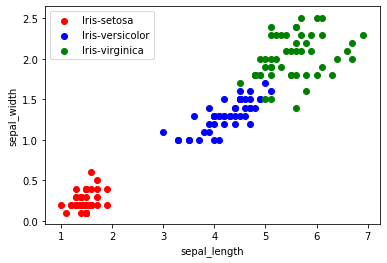

In [22]:
# Extraction des features 
X_iris = iris.iloc[:, :-1].values # Premières colonnes 

Y_iris = iris.iloc[:,-1].values # Dernière colonne 

setosa = iris["class"] == "Iris-setosa"
versicolor = iris["class"] == "Iris-versicolor"
virginica = iris["class"] == "Iris-virginica"

plt.scatter(X_iris[setosa, 0], X_iris[setosa, 1], color="red", label="Iris-setosa")
plt.scatter(X_iris[versicolor, 0], X_iris[versicolor, 1], color="blue", label="Iris-versicolor")
plt.scatter(X_iris[virginica, 0], X_iris[virginica, 1], color="green", label="Iris-virginica")

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()

In [23]:
# Randomization des données pour marquer les 80% lignes
# Le même masque sera utilisé pour les deux solutions
iris_msk = np.random.rand(len(X_iris)) < 0.8 
X_iris_train = np.array(X_iris[iris_msk, :], dtype=np.float32)
X_iris_test = np.array(X_iris[~iris_msk, :], dtype=np.float32)

In [24]:
iris["class"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [25]:
# Encodage des classes 
Y_iris_setosa = (Y_iris == "Iris-setosa").astype(int)
Y_iris_versicolor = (Y_iris == "Iris-versicolor").astype(int)
Y_iris_virginica = (Y_iris == "Iris-virginica").astype(int)

Y_iris_setosa.sum(), Y_iris_versicolor.sum(), Y_iris_virginica.sum()

(50, 50, 50)

In [26]:
# encoder setosa par 1
Y_iris_setosa_test = np.array(Y_iris_setosa[~iris_msk], dtype=np.float32)
# encoder versicolor par 2
Y_iris_versicolor_test = np.array(Y_iris_versicolor[~iris_msk], dtype=np.float32) * 2
# encoder la sortie par 3
Y_iris_virginica_test = np.array(Y_iris_virginica[~iris_msk], dtype=np.float32) * 3
# fusionner les trois vecteurs pour avoir un seul avec les classes encodées
Y_iris_test = Y_iris_setosa_test + Y_iris_versicolor_test + Y_iris_virginica_test 
Y_iris_test

array([3., 1., 1., 1., 2., 1., 2., 3., 3., 3., 2., 2., 2., 2., 1., 1., 2.,
       2., 2., 3., 3., 2., 3., 1., 2., 3., 3., 1.], dtype=float32)

### 2.1- Entrainer 3 modèles de régression lgistique binaire

Pour ce faire, recopier votre solution du TP précédent

In [27]:
def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)

# TODO recopier z_1(X, Theta) ici
def z_1(X, Theta):
    return np.dot(X, Theta)

# TODO recopier sigmoid(X) ici
def sigmoid(z):
    return  1/(1+np.exp(-z))

def h_1(X, Theta, mean=None, std=None, const=False): 
    norm = (mean is not None) and (std is not None)
    X_pre, mean, std = preparer(X, norm, const, mean=mean, std=std)
    return sigmoid(z_1(X_pre, Theta))

# TODO recopier J_1(H, Y) ici
def J_1(H, Y):
    #The loss function J(w)
    cout = Cost(H,Y) 
    m, somme = cout.size, np.sum(cout)
    return somme/m

# TODO recopier gradient_1(X, H, Y) ici
def gradient_1(X, H, Y):
    m=Y.size
    somme=np.dot(np.subtract(H, Y),X)
    return somme/m

def entrainer_1(X, Y, norm=True, const=True, nbr_iter=200, alpha=1., eps=0.01, 
                theta_func=generer_zeros_1, h_func=h_1, J_func=J_1, grad_func=gradient_1): 
    
    X_pre, mean, std = preparer(X, norm, const)
    Theta = theta_func(X_pre.shape[1])
    
    couts = []
    couts.append(J_func(h_func(X_pre, Theta), Y))
    
    for i in range(nbr_iter):
        H = h_func(X_pre, Theta)
        Theta -= alpha * grad_func(X_pre, H, Y)
        couts.append(J_func(H, Y))
    
    return Theta, mean, std, couts

# TODO recopier predire_1(H, seuil=0.5) ici
def predire_1(H, seuil=0.5):  
    return (H>=seuil).astype(int)

class RegLogistique(object):
    
    def __init__(self, nbr_iter=100, alpha=1., theta_func=generer_zeros_1, norm=True, const=True): 
        self.nbr_iter = nbr_iter
        self.alpha = alpha
        self.theta_func = theta_func
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y): 
        self.Theta, self.mean, self.std, self.couts = entrainer_1(X, Y, 
                                                                  nbr_iter=self.nbr_iter, 
                                                                  alpha=self.alpha, 
                                                                  theta_func=self.theta_func, 
                                                                  norm=self.norm, 
                                                                  const=self.const)
        
    # La prédiction
    # si prob=True elle rend un vecteur de probabilités
    # sinon elle rend une vecteur de 1 et 0
    def predire(self, X, prob=True, seuil=0.5):
        H = h_1(X, self.Theta, self.mean, self.std, self.const)
        if prob:
            return H
        return predire_1(H, seuil=seuil)

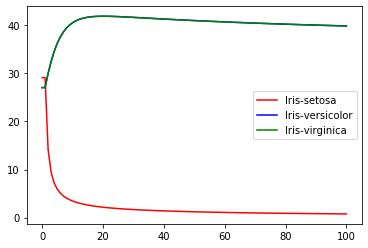

In [28]:
#modèle 1
Y_iris_setosa_train = np.array(Y_iris_setosa[iris_msk], dtype=np.float32)
reg_iris_setosa = RegLogistique()
reg_iris_setosa.entrainer(X_iris_train, Y_iris_setosa_train)

#modèle 2
Y_iris_versicolor_train = np.array(Y_iris_versicolor[iris_msk], dtype=np.float32)
reg_iris_versicolor = RegLogistique()
reg_iris_versicolor.entrainer(X_iris_train, Y_iris_versicolor_train)

#modèle 3
Y_iris_virginica_train = np.array(Y_iris_virginica[iris_msk], dtype=np.float32)
reg_iris_virginica = RegLogistique()
reg_iris_virginica.entrainer(X_iris_train, Y_iris_versicolor_train)


#Affichage des évolutions des couts 
plt.plot(reg_iris_setosa.couts, color="red", label="Iris-setosa")
plt.plot(reg_iris_versicolor.couts, color="blue", label="Iris-versicolor")
plt.plot(reg_iris_virginica.couts, color="green", label="Iris-virginica")
plt.legend()
plt.show()

**Question** : Que remarquez-vous concernant la convergence de chaque modèle?

**Réponse** : Pour les 3 modeles qu'on vient d'entraîner, on remarque que le modele:

**Iris-setosa** :
    a une convergence rapide avec un taux d'erreur petite apres un certain nombre d'itération considerablement petit et qu'on peut juger comme meilleure modéle.
    
Par contre pour les deux modeles:

**Iris-versicolor** et **Iris-virginica** :
Ont une convergence lente
Taux d'erreur elevé

### 2.2- Entrainer 1 modèle de régression lgistique multinomiale


In [29]:
# Encodage des classes (on peut utiliser OneHotEncoder de scikit-learn)
# Ici, on va l'implémenter en utilisant numpy pour bien comprendre comment l'encodage fonctionne 
Y_iris_onehot_train = np.column_stack((Y_iris_setosa_train, Y_iris_versicolor_train, Y_iris_virginica_train))

Y_iris_onehot_train[:4, :], Y_iris[:4]

(array([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.]], dtype=float32),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'],
       dtype=object))

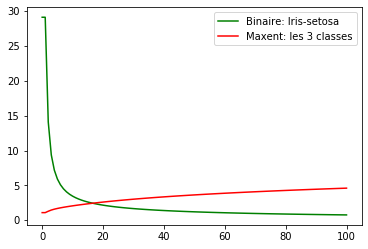

In [30]:
maxent_iris = MaxEnt()
maxent_iris.entrainer(X_iris_train, Y_iris_onehot_train)


#Affichage des évolutions des couts 
plt.plot(reg_iris_setosa.couts, color="green", label="Binaire: Iris-setosa")
plt.plot(maxent_iris.couts, color="red", label="Maxent: les 3 classes")
plt.legend()
plt.show()

**Question** : Que remarquez-vous? Que pouvez-vous dire à propos de la classe "Iris-setosa"?

**Réponse** : On faisant le comparaison entre les deux modele Maxent et celui de regression logistique binaire Iris-setosa , on voix bien qu'a partir de 20 iterations le modele binaire converge et donne un taux d'errure bien moins de celui de la logistique Multiple.

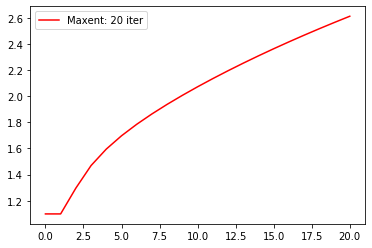

In [31]:
# On entraine un modèle Maxent sans le laisser converger
# nombre des itérations 20
maxent20_iris = MaxEnt(nbr_iter=20)
maxent20_iris.entrainer(X_iris_train, Y_iris_onehot_train)


#Affichage des évolutions des couts 
plt.plot(maxent20_iris.couts, color="red", label="Maxent: 20 iter")
plt.legend()
plt.show()

### 2.3- Tester et comparer les deux solutions 




In [32]:
# Prédiction des probabilités avec les trois modèles binaires
#modèle 1
iris_setosa_prob = reg_iris_setosa.predire(X_iris_test)
#modèle 2
iris_versicolor_prob = reg_iris_versicolor.predire(X_iris_test)
#modèle 3
iris_virginica_prob = reg_iris_virginica.predire(X_iris_test)

# fusionner les probabilités en une matrice
iris_modeles3_prob = np.column_stack((iris_setosa_prob, iris_versicolor_prob, iris_virginica_prob))

# encodage des sorties en 1, 2, 3
iris_modeles3_test = np.argmax(iris_modeles3_prob, axis=1) + 1

iris_modeles3_test

array([2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1], dtype=int64)

In [33]:
# Prédiction des probabilités avec le modèle multinomial
iris_maxent_prob = maxent_iris.predire(X_iris_test)

# encodage des sorties en 1, 2, 3
iris_maxent_test = np.argmax(iris_maxent_prob, axis=1) + 1

iris_maxent_test

array([2, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2,
       3, 1, 2, 3, 3, 1], dtype=int64)

In [34]:
# Prédiction des probabilités avec le modèle multinomial avec 5 itérations
iris_maxent20_prob = maxent20_iris.predire(X_iris_test)

# encodage des sorties en 1, 2, 3
iris_maxent20_test = np.argmax(iris_maxent20_prob, axis=1) + 1

iris_maxent20_test

array([2, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2,
       3, 1, 2, 3, 3, 1], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
noms_classes = ["setosa", "versicolor", "virginica"]

# Par 3 modèles
print("En utilisant 3 modèles de régression binaire")
print(classification_report(Y_iris_test, iris_modeles3_test, target_names=noms_classes))

# Par 1 modèle multinomial
print("En utilisant 1 modèle de régression multinomiale")
print(classification_report(Y_iris_test, iris_maxent_test, target_names=noms_classes))

# Par 1 modèle multinomial (20 itérations)
print("En utilisant 1 modèle de régression multinomiale (20 itérations)")
print(classification_report(Y_iris_test, iris_maxent20_test, target_names=noms_classes))

# Ignorer le Warning en bas

En utilisant 3 modèles de régression binaire
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.55      1.00      0.71        11
   virginica       0.00      0.00      0.00         9

    accuracy                           0.68        28
   macro avg       0.52      0.67      0.57        28
weighted avg       0.50      0.68      0.56        28

En utilisant 1 modèle de régression multinomiale
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.89      0.94         9

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.97        28
weighted avg       0.97      0.96      0.96        28

En utilisant 1 modèle de régression multinomiale (20 itérations)
              precision    recall  f1-score   support

      setosa       1.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Question** : Anlysez les résulats

**Modele One-Vs-one(multinomial):**

- le modèle a correctement classé chaque espèce avec une precesion de 93.93%
- Convergence rapide avec avec moins de 20 itteration

**Modele One-Vs-all:**
- Les metriques montrent une mauvaise performance du modele avec une precesion loin du seuil ideal de 60.6%.
- Crée des dependances entre les différentes classes des espèces ce qui reflète la mediocricité du classifieure.
- l'échelle des valeurs peuvent différer entre les 3 classificateurs binaires.
- Même si la distribution des classes est équilibrée dans l'ensemble de formation les apprenants de la classification binaire voient des distributions déséquilibrées parce que, généralement, l'ensemble des négatifs (Classe negative Y= 0) qu'ils voient est beaucoup plus grand que l'ensemble des positifs (Classe positive Y=1).